<AxesSubplot:>

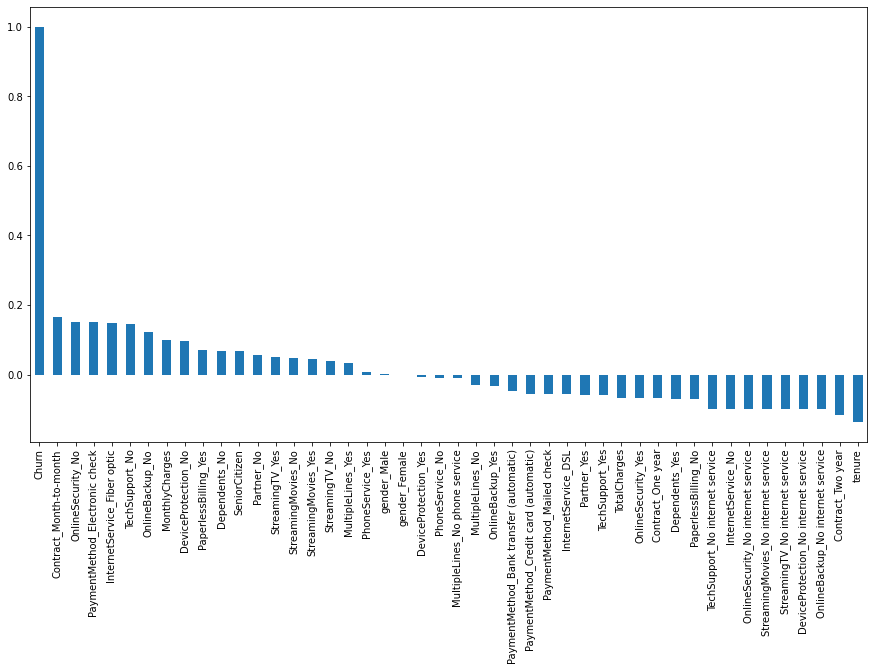

In [1]:
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # value scaling
from sklearn.model_selection import train_test_split # train and test data
from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn import metrics # metric functions
from imblearn.over_sampling import RandomOverSampler

# read xlsx -> csv converted data set
customer_data = pd.read_csv('./nbi_data_set - in.csv')

# convert boolean to binary
customer_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
customer_data['Churn'].replace(to_replace='No',  value=0, inplace=True)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# remove any missing values 
customer_data.dropna(inplace = True)

# remove any duplicates

customer_data.drop_duplicates(inplace=True)
# remove IDs from the data set, since is messes up, and slows down, the plotting
customer_data = customer_data.iloc[:,1:]


# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#computing-indicator-dummy-variables
# convert to dummy DataFrame
df_dummies = pd.get_dummies(customer_data)

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
# create a new figure in inches
plt.figure(figsize=(15,8))

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
# correlate columns, excluding NA/null values and plot it
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

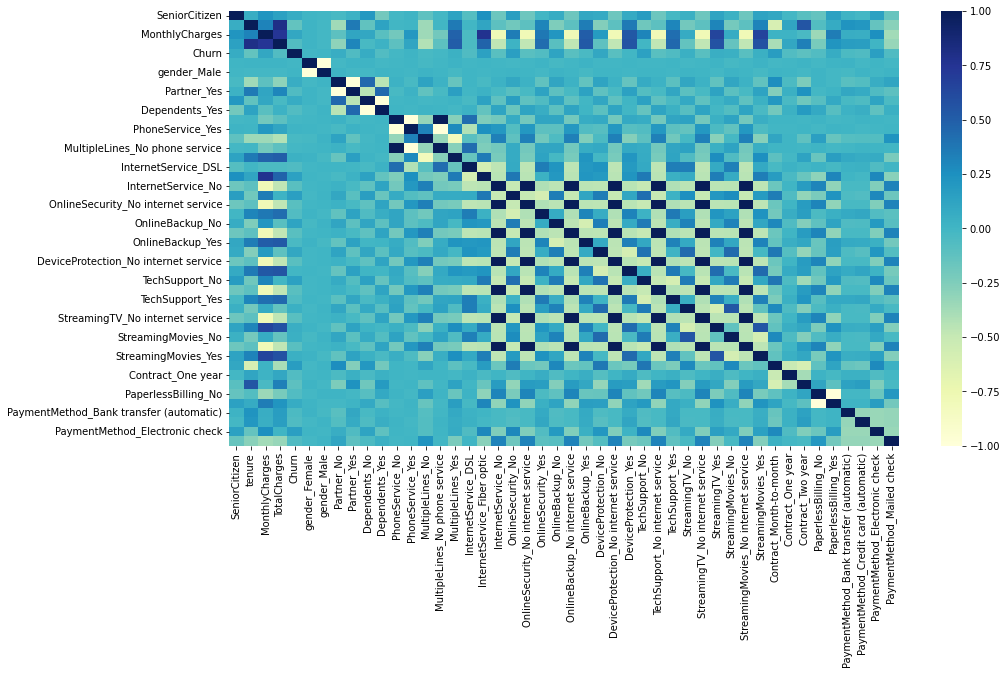

In [2]:
plt.figure(figsize=(15,8))

corr_mask = np.triu(df_dummies.corr())
h_map = sns.heatmap(df_dummies.corr(), annot=False, cmap="YlGnBu")
plt.show()

In [3]:
print("the above plot initially shows that customers with month-to-month contracts and OnlineSecurity_No is affecting the churn in a negative way, so bundling a security package with a one or two year contracts targeting customers without a fiber connection is an option.")

the above plot initially shows that customers with month-to-month contracts and OnlineSecurity_No is affecting the churn in a negative way, so bundling a security package with a one or two year contracts targeting customers without a fiber connection is an option.


In [4]:
# use the dummy data to create y, X (dropping the 'Churn' for X)
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
# scale all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

# test_size=0.2: 96.2, test_size=0.3: 96.3, test_size=0.4: 96.4, test_size=0.5: 96.4, test_size=0.7: 96.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)

In [7]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print(f'Accuracy of Logistic Regression on test set: {(metrics.accuracy_score(y_test, prediction_test) * 100):.1f}')

Accuracy of Logistic Regression on test set: 96.4


In [8]:
results1=metrics.confusion_matrix(y_test, prediction_test)
print(results1)

[[2068    0]
 [  78    0]]


AxesSubplot(0.125,0.125;0.775x0.755)


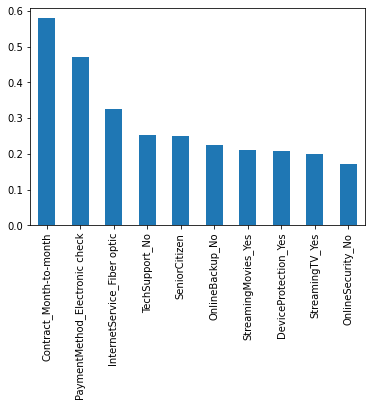

In [9]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
# print top 10 churn reasons
weights = pd.Series(model.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


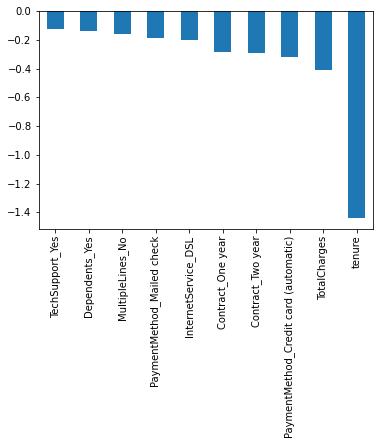

In [10]:
# print top 10 reasons customers are staying
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [11]:
# https://medium.com/analytics-vidhya/handling-imbalanced-datasets-with-oversampling-techniques-its-pros-cons-ba9f36ac5b71

upsampling = RandomOverSampler(random_state=42)
X_sampling, y_sampling = upsampling.fit_resample(X, y)
print(f"X: {X.shape}\ny: {y.shape}\nX Resampled: {X_sampling.shape}\ny Resampled: {y_sampling.shape}")

X: (5363, 45)
y: (5363,)
X Resampled: (10326, 45)
y Resampled: (10326,)


In [12]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_sampling, y_sampling, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.4, random_state=42)

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model = LogisticRegression()
result = model.fit(X_train_full, y_train_full)
prediction_test = model.predict(X_test)

In [14]:
print(metrics.confusion_matrix(y_test, prediction_test))


[[1495  616]
 [ 382 1638]]


AxesSubplot(0.125,0.125;0.775x0.755)


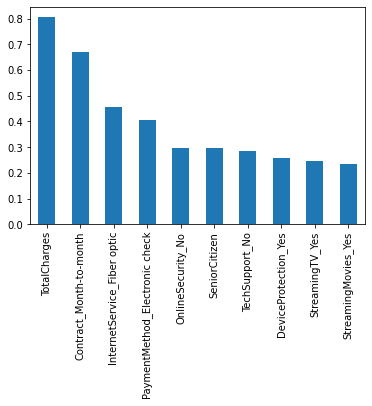

In [15]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
# print top 10 churn reasons
weights = pd.Series(model.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


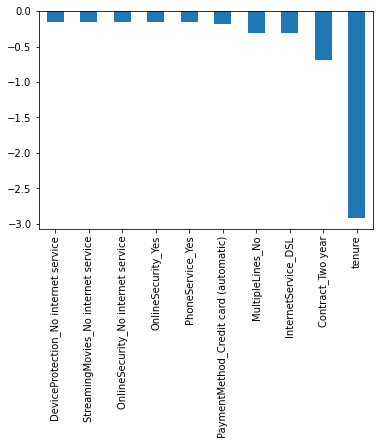

In [16]:
# print top 10 reasons customers are staying
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [17]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print(f'Accuracy of Logistic Regression on test set: {(metrics.accuracy_score(y_test, prediction_test) * 100):.1f}')

Accuracy of Logistic Regression on test set: 75.8


In [18]:
print("bundling a security package with a one or two year contracts targeting customers without a fiber connection and allow for easier way to pay for reoccurring plans would likely decrease the churn.")

bundling a security package with a one or two year contracts targeting customers without a fiber connection and allow for easier way to pay for reoccurring plans would likely decrease the churn.
